In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# NLP libraries

In [2]:
import requests
import bs4
import textblob
import html5lib

In [3]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install html5lib

Note: you may need to restart the kernel to use updated packages.


In [5]:
wiki = requests.get("https://en.wikipedia.org/wiki/India")

In [6]:
from bs4 import BeautifulSoup

In [7]:
india = BeautifulSoup(wiki.content,'lxml')

In [8]:
india = india.getText(strip=True)

In [9]:
india

'India - WikipediaJump to contentMain menuMain menumove to sidebarhideNavigationMain pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonateContributeHelpLearn to editCommunity portalRecent changesUpload fileLanguagesLanguage links are at the top of the page.SearchSearchCreate accountLog inPersonal toolsCreate accountLog inPages for logged out editorslearn moreContributionsTalkContentsmove to sidebarhide(Top)1Etymology2HistoryToggle History subsection2.1Ancient India2.2Medieval India2.3Early modern India2.4Modern India3Geography4Biodiversity5Politics and governmentToggle Politics and government subsection5.1Politics5.2Government5.3Administrative divisions5.3.1States5.3.2Union territories6Foreign, economic and strategic relations7EconomyToggle Economy subsection7.1Industries7.2Energy7.3Socio-economic challenges8Demographics, languages and religion9CultureToggle Culture subsection9.1Visual art9.2Architecture9.3Literature9.4Performing arts and media9.5Society9.6Education9.

# As we get all the text. Now we need to clean our content and for that we need import Regular Expression.

In [10]:
import re

In [11]:
india = re.sub(r'\[\d+\]',"",india)

In [12]:
india = re.sub(r'\[\w+\]',"",india)

In [13]:
india = re.sub('[0-9]+',"",india)

In [14]:
india = re.sub(r'\[.*?\]',"",india)

In [15]:
india

'India - WikipediaJump to contentMain menuMain menumove to sidebarhideNavigationMain pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonateContributeHelpLearn to editCommunity portalRecent changesUpload fileLanguagesLanguage links are at the top of the page.SearchSearchCreate accountLog inPersonal toolsCreate accountLog inPages for logged out editorslearn moreContributionsTalkContentsmove to sidebarhide(Top)EtymologyHistoryToggle History subsection.Ancient India.Medieval India.Early modern India.Modern IndiaGeographyBiodiversityPolitics and governmentToggle Politics and government subsection.Politics.Government.Administrative divisions..States..Union territoriesForeign, economic and strategic relationsEconomyToggle Economy subsection.Industries.Energy.Socio-economic challengesDemographics, languages and religionCultureToggle Culture subsection.Visual art.Architecture.Literature.Performing arts and media.Society.Education.Clothing.Cuisine.Sports and recreationSee alsoNo

In [16]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
sentence = sent_tokenize(india)

In [18]:
len(sentence)

837

In [19]:
sentence

["India - WikipediaJump to contentMain menuMain menumove to sidebarhideNavigationMain pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonateContributeHelpLearn to editCommunity portalRecent changesUpload fileLanguagesLanguage links are at the top of the page.SearchSearchCreate accountLog inPersonal toolsCreate accountLog inPages for logged out editorslearn moreContributionsTalkContentsmove to sidebarhide(Top)EtymologyHistoryToggle History subsection.Ancient India.Medieval India.Early modern India.Modern IndiaGeographyBiodiversityPolitics and governmentToggle Politics and government subsection.Politics.Government.Administrative divisions..States..Union territoriesForeign, economic and strategic relationsEconomyToggle Economy subsection.Industries.Energy.Socio-economic challengesDemographics, languages and religionCultureToggle Culture subsection.Visual art.Architecture.Literature.Performing arts and media.Society.Education.Clothing.Cuisine.Sports and recreationSee alsoN

In [20]:
from textblob import TextBlob

In [21]:
def analyze_sentiment(tweet):
    analysis=TextBlob(tweet)
    if analysis.sentiment.polarity>0:
        return 'Positive'
    elif analysis.sentiment.polarity==0:
        return 'Neutral'
    else:
        return 'Negative'

In [22]:
sentence = pd.DataFrame(sentence)

In [23]:
sentence.columns = ['sentence']

In [24]:
sentence['sentiment']=[str(analyze_sentiment(x)) for x in sentence.sentence]

In [25]:
sentence.sentiment.value_counts()

Neutral     506
Positive    255
Negative     76
Name: sentiment, dtype: int64

In [26]:
from nltk.tokenize import word_tokenize

In [27]:
indiawords = word_tokenize(india)

In [28]:
indiawords = [word for word in indiawords if word.isalnum()]

In [29]:
from nltk.corpus import stopwords

In [30]:
stop_words = set(stopwords.words('english'))

In [31]:
indiawords = [word for word in indiawords if not str.lower(word) in stop_words]

In [32]:
from nltk.probability import FreqDist

In [33]:
wordfreq = FreqDist(indiawords)

In [34]:
wordfreq

FreqDist({'India': 470, 'ISBN': 156, 'Indian': 142, 'pp': 125, 'retrieved': 104, 'Retrieved': 95, 'fromthe': 69, 'Press': 69, 'University': 67, 'th': 62, ...})

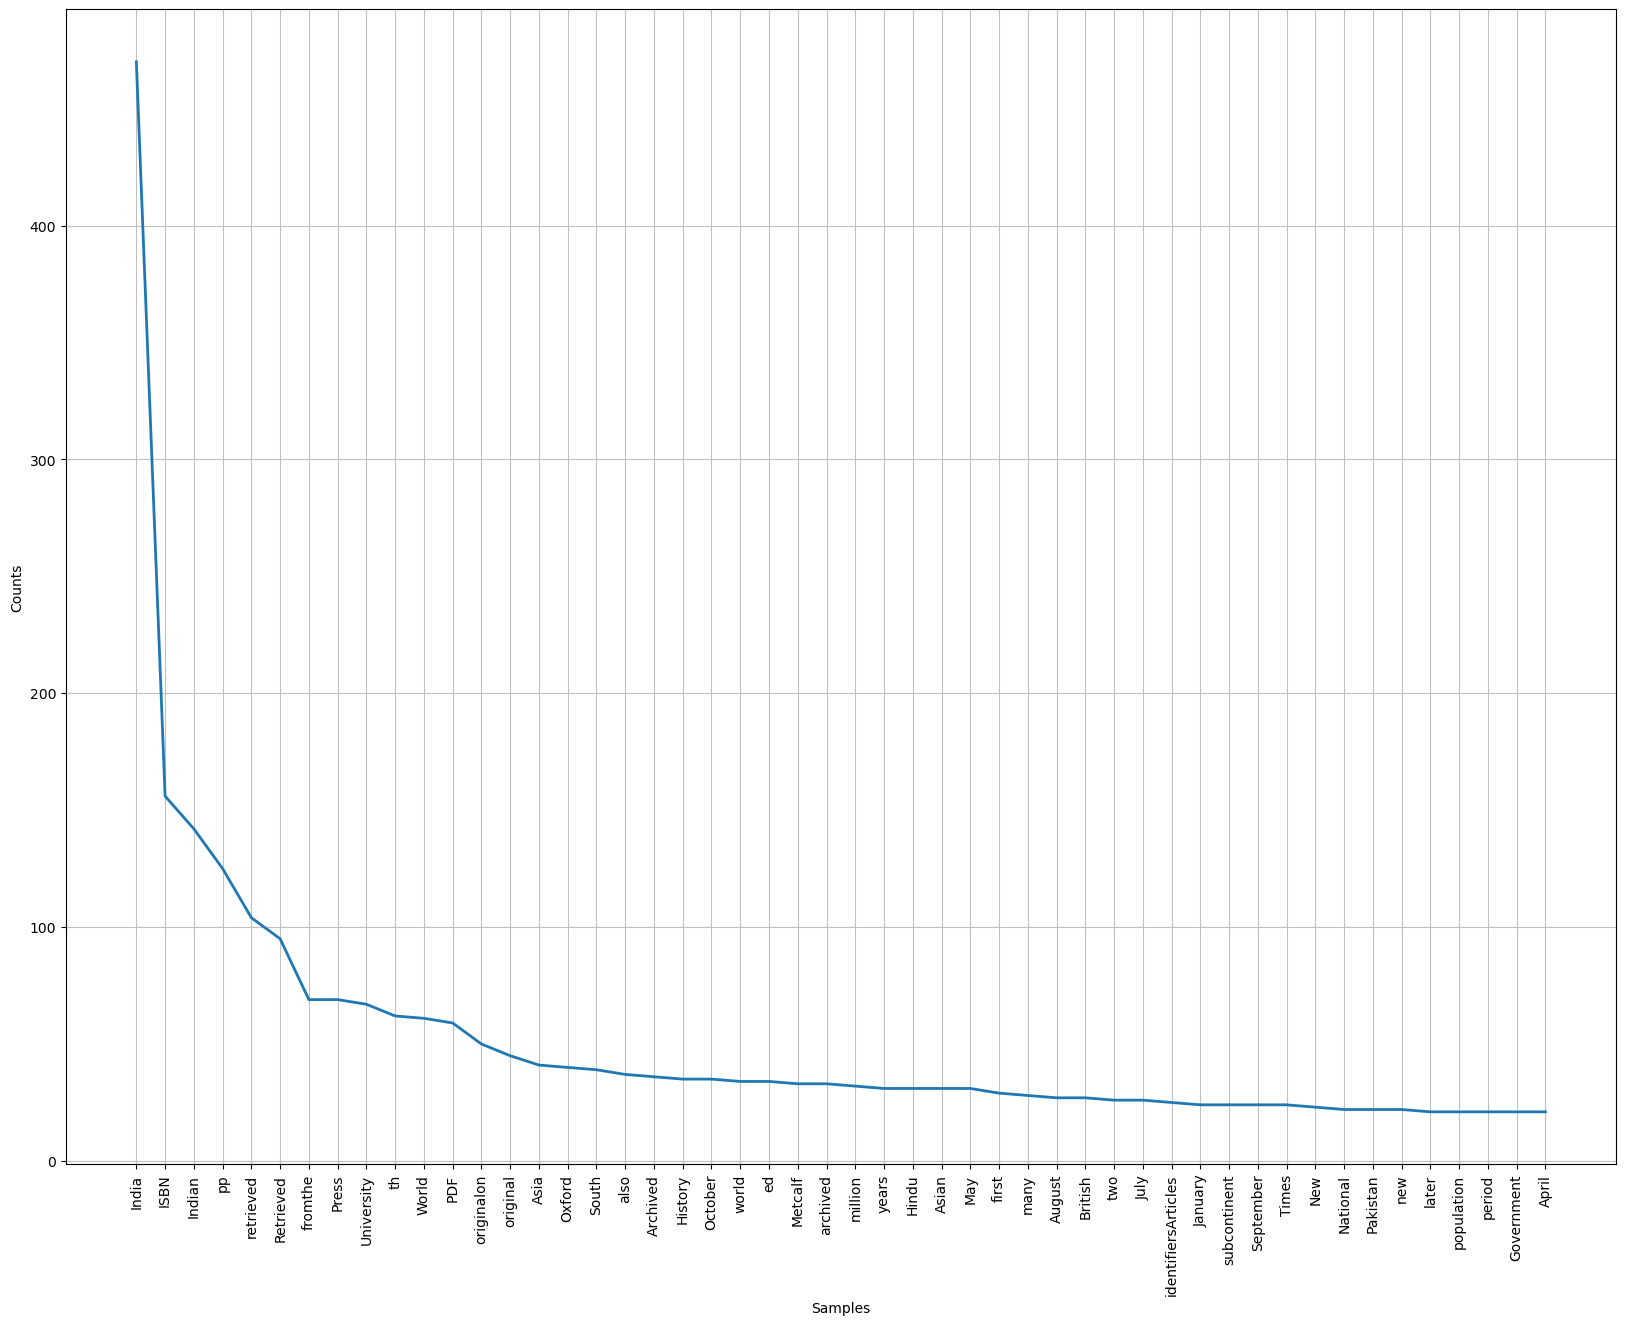

<Axes: xlabel='Samples', ylabel='Counts'>

In [35]:
plt.figure(figsize=(20,15))
wordfreq.plot(50,cumulative=False)

In [36]:
indiawords = [w for w in indiawords if not w in ['ISBN','pp','PDF','th','fromthe','ed','also','Press']]

In [37]:
from wordcloud import WordCloud

In [38]:
india_words = (" ").join(indiawords)

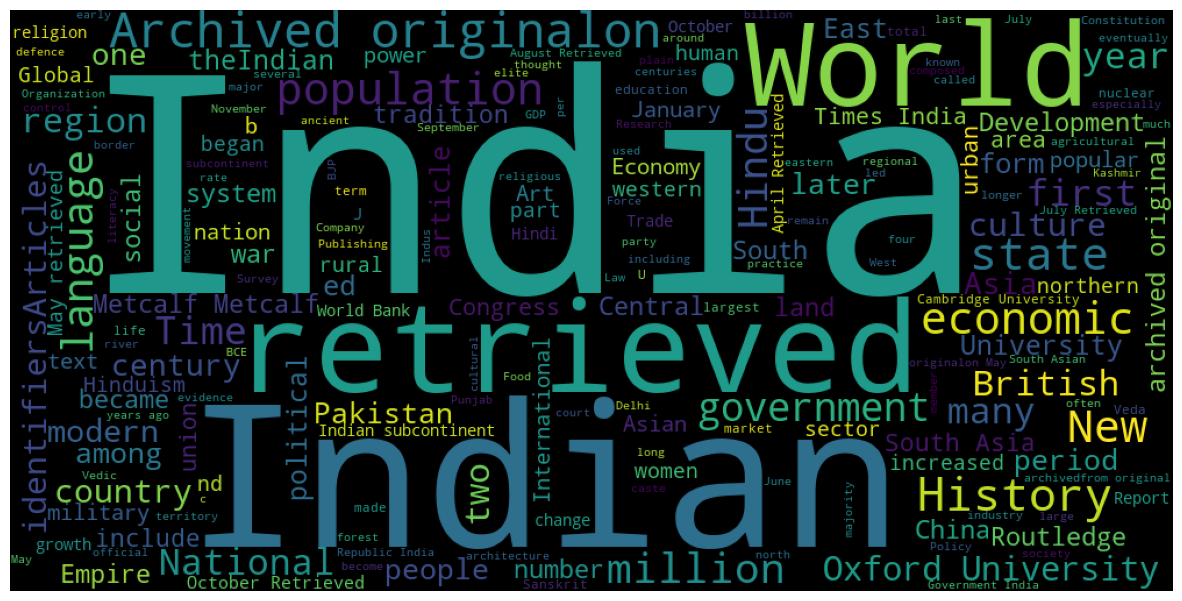

In [39]:
wordcloud = WordCloud(width=1000,height=500).generate(india_words)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()